In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading the CSV file

In [115]:

data = pd.read_csv("Data_final_CSV.csv")
data

,Date,Nominal,CPI1,CPI2,Real
0,Feb-14,112.1,100.72,107.67,119.84
1,Mar-14,112.3,100.93,108.36,120.61
2,Apr-14,112.5,103.04,108.72,118.67
3,May-14,111.7,103.46,109.10,117.80
4,Jun-14,112.0,103.36,109.30,118.48
...,...,...,...,...,...
115,Sep-23,162.3,112.01,141.15,204.52
116,Oct-23,164.2,112.95,141.10,205.12
117,Nov-23,164.3,112.74,140.81,205.20
118,Dec-23,158.0,112.64,140.67,197.38


# Create the log of nominal exchange rate, the log of real exchange rate, the log of consumer price index in the home country and the log of consumer price index in the foreign country

In [116]:
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')
data_log = data.copy()
data_log['Nominal'] = np.log(data_log['Nominal'])
data_log['CPI1'] = np.log(data_log['CPI1'])
data_log['CPI2'] = np.log(data_log['CPI2'])
data_log['Real'] = np.log(data_log['Real'])
data_log

,Date,Nominal,CPI1,CPI2,Real
0,2014-02-01,4.719391,4.612344,4.679071,4.786158
1,2014-03-01,4.721174,4.614427,4.685459,4.792562
2,2014-04-01,4.722953,4.635117,4.688776,4.776347
3,2014-05-01,4.715817,4.639185,4.692265,4.768988
4,2014-06-01,4.718499,4.638218,4.694096,4.774744
...,...,...,...,...,...
115,2023-09-01,5.089446,4.718588,4.949823,5.320666
116,2023-10-01,5.101085,4.726945,4.949469,5.323595
117,2023-11-01,5.101694,4.725084,4.947411,5.323985
118,2023-12-01,5.062595,4.724197,4.946417,5.285131


# Implementing Augmented Dickey Fuller test to check stationarity

In [117]:
from statsmodels.tsa.stattools import adfuller

# Defining the Augmented dickey fuller test function
def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')  # ADF Test
    output = {
        'Test Statistic': result[0], 
        'p-value': result[1], 
        'Lags Used': result[2], 
        'Number of Observations Used': result[3], 
        'Critical Values': result[4],
    }
    return output

# Applying the Augmented dickey fuller  test to each column in data_log
adf_results = {}
for column in ['Nominal', 'CPI1', 'CPI2', 'Real']:
    adf_results[column] = adf_test(data_log[column], title=column)

# Formatting the ADF results for each column  
adf_results_display = {}
for column, results in adf_results.items():
    adf_results_display[column] = {
        'Test Statistic': results['Test Statistic'],
        'p-value': results['p-value'],
        'Lags Used': results['Lags Used'],
        'Number of Observations Used': results['Number of Observations Used'],
        'Critical Values': results['Critical Values'],
    }

adf_results_display




{'Nominal': {'Test Statistic': -0.912836836968833,
  'p-value': 0.7837156741246352,
  'Lags Used': 1,
  'Number of Observations Used': 118,
  'Critical Values': {'1%': -3.4870216863700767,
   '5%': -2.8863625166643136,
   '10%': -2.580009026141913}},
 'CPI1': {'Test Statistic': 0.647173535729212,
  'p-value': 0.988722462651416,
  'Lags Used': 0,
  'Number of Observations Used': 119,
  'Critical Values': {'1%': -3.4865346059036564,
   '5%': -2.8861509858476264,
   '10%': -2.579896092790057}},
 'CPI2': {'Test Statistic': -0.35275262460399986,
  'p-value': 0.917693561647879,
  'Lags Used': 11,
  'Number of Observations Used': 108,
  'Critical Values': {'1%': -3.4924012594942333,
   '5%': -2.8886968193364835,
   '10%': -2.5812552709190673}},
 'Real': {'Test Statistic': -0.09536102877536166,
  'p-value': 0.9498986371856996,
  'Lags Used': 1,
  'Number of Observations Used': 118,
  'Critical Values': {'1%': -3.4870216863700767,
   '5%': -2.8863625166643136,
   '10%': -2.580009026141913}}}

# Plotting ADF test

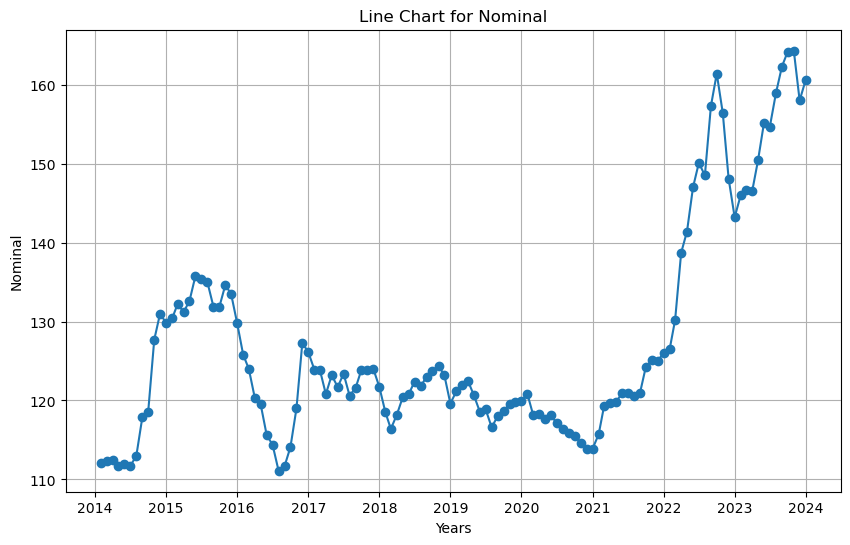

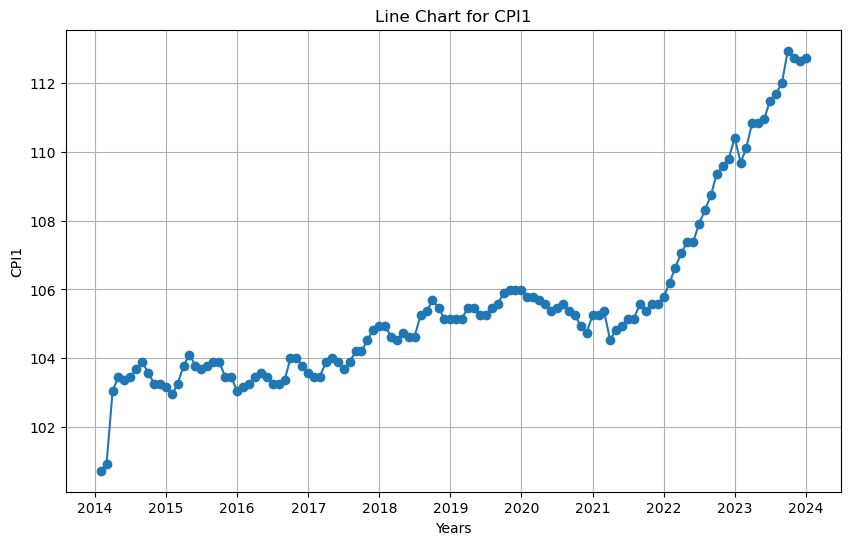

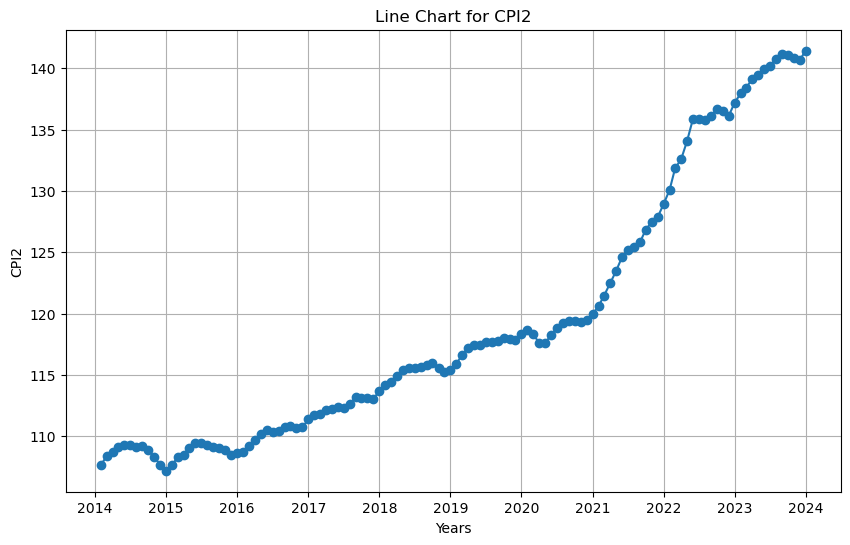

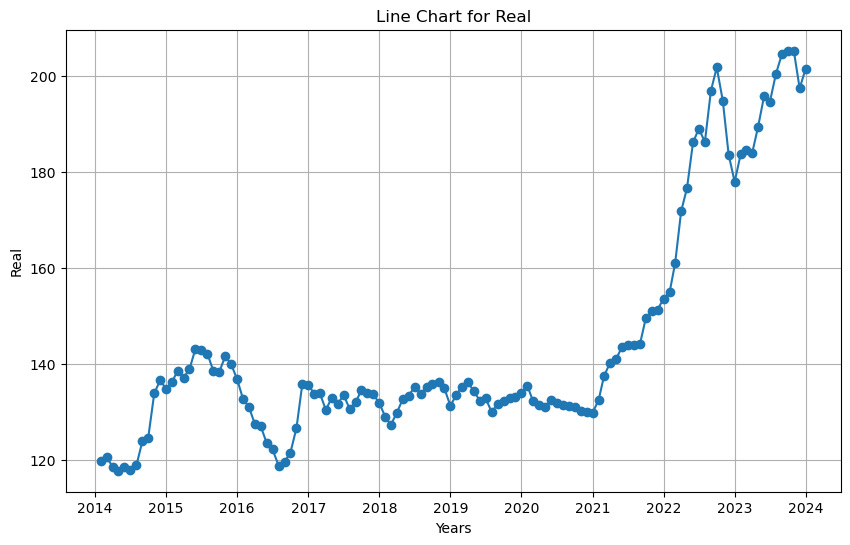

In [118]:
melted_data = data.melt(id_vars=['Date'], value_vars=['Nominal', 'CPI1', 'CPI2', 'Real'], 
                        var_name='Variable', value_name='Value')

# Plotting the Augmented Dickey Fuller test
def plot_line_chart(series, title='', y_label=''):
    plt.figure(figsize=(10, 6))
    plt.plot(series['Date'], series['Value'], marker='o')
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Plotting the line charts based on each column
for column in ['Nominal', 'CPI1', 'CPI2', 'Real']:
    subset = melted_data[melted_data['Variable'] == column]
    plot_line_chart(subset, f'Line Chart for {column}', column)

# Using Differencing to Convert non-stationary time series to Stationary time series

In [119]:
from statsmodels.tsa.stattools import adfuller

# Function of Augmented Dickey Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4],
    }
    return output


# Date is set as index
data_log.set_index('Date', inplace=True)

# Using first-order differencing
data_log_diff = data_log.diff().dropna()

# Dictionary to store ADF test results after differencing
adf_results_diff = {}

# Performing the Augmented Dickey Fuller  test on the differenced columns
for column in ['Nominal', 'CPI1', 'CPI2', 'Real']:
    adf_results_diff[column] = adf_test(data_log_diff[column])

# Augmented Dickey Fuller test results after differencing
for column, result in adf_results_diff.items():
    print(f"ADF Test Results for {column} after first-order differencing:")
    print(f"Test Statistic: {result['Test Statistic']}")
    print(f"p-value: {result['p-value']}")
    for key, value in result['Critical Values'].items():
        print(f"    {key}: {value}")
    print("\n")

ADF Test Results for Nominal after first-order differencing:
Test Statistic: -7.732969583196412
p-value: 1.1126946597302433e-11
    1%: -3.4870216863700767
    5%: -2.8863625166643136
    10%: -2.580009026141913


ADF Test Results for CPI1 after first-order differencing:
Test Statistic: -3.6858769898865282
p-value: 0.004316249891669841
    1%: -3.489589552580676
    5%: -2.887477210140433
    10%: -2.580604145195395


ADF Test Results for CPI2 after first-order differencing:
Test Statistic: -2.0245357215748285
p-value: 0.275919725548261
    1%: -3.4924012594942333
    5%: -2.8886968193364835
    10%: -2.5812552709190673


ADF Test Results for Real after first-order differencing:
Test Statistic: -7.912578615957486
p-value: 3.912169377193208e-12
    1%: -3.4870216863700767
    5%: -2.8863625166643136
    10%: -2.580009026141913




# Plotting stationary time series

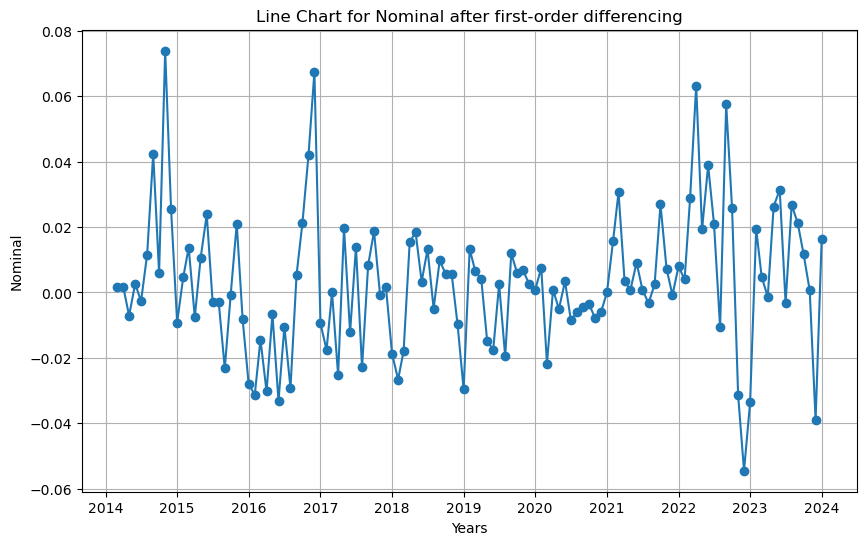

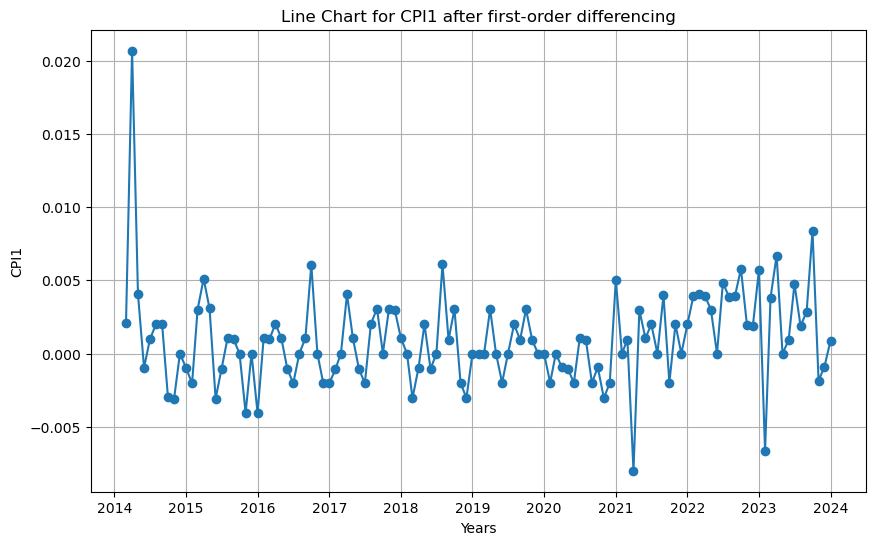

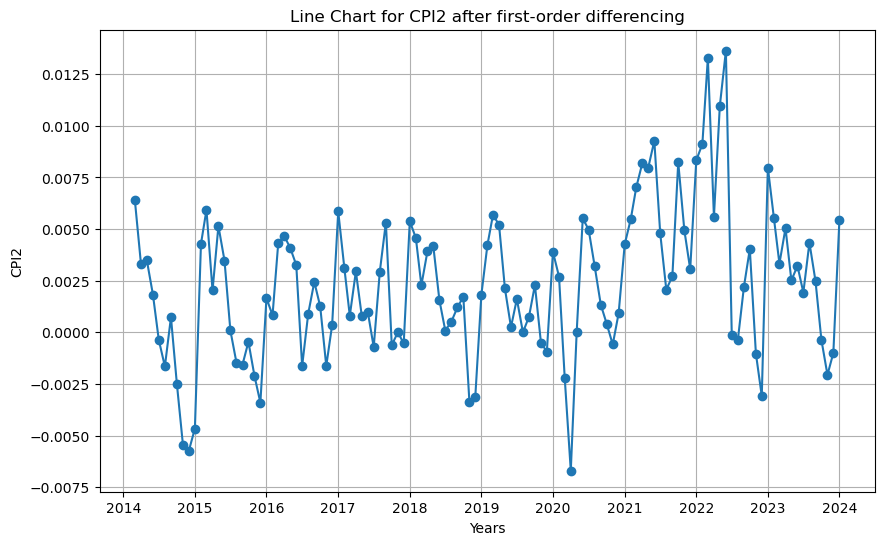

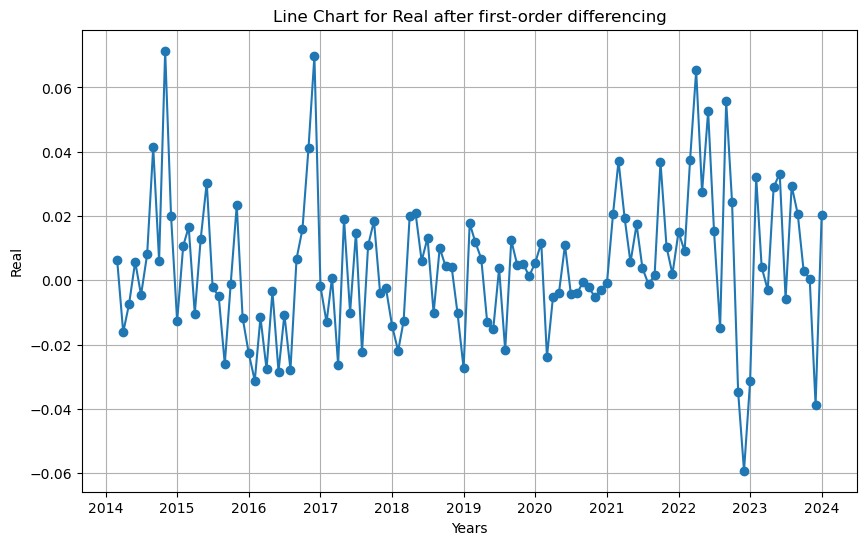

In [120]:
def plot_line_chart(series, title, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(series, marker='o')
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Plotting Line charts for stationary time series
for column in ['Nominal', 'CPI1', 'CPI2', 'Real']:
    plot_line_chart(data_log_diff[column], f'Line Chart for {column} after first-order differencing', column)

# Nominal, CPI1, Real are stationary but CP2 is not so applying second order differencing on CPI2

In [121]:


# Using second-order differencing 
data_log_diff['CPI2_Second_Order_Diff'] = data_log_diff['CPI2'].diff().dropna()

#  Augmented Dickey Fuller  test on the second-order differenced CPI2
cpi2_adf_second_order = adf_test(data_log_diff['CPI2_Second_Order_Diff'].dropna())

# Printing the results
print(f"ADF Test Results for 'CPI2' after second-order differencing:")
print(f"Test Statistic: {cpi2_adf_second_order['Test Statistic']}")
print(f"p-value: {cpi2_adf_second_order['p-value']}")
for key, value in cpi2_adf_second_order['Critical Values'].items():
    print(f"    {key}: {value}")





ADF Test Results for 'CPI2' after second-order differencing:
Test Statistic: -7.4637887803580645
p-value: 5.269247473378558e-11
    1%: -3.4924012594942333
    5%: -2.8886968193364835
    10%: -2.5812552709190673


# Plotting stationary CPI2

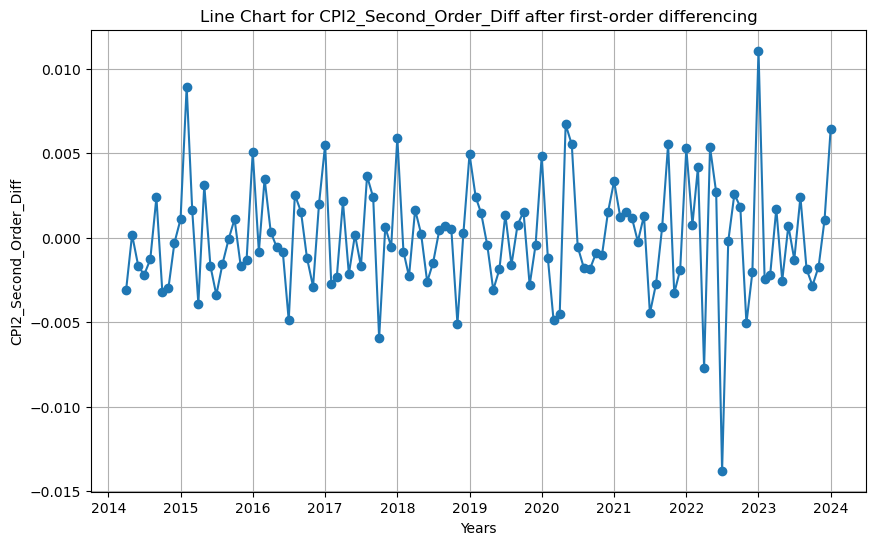

In [122]:
def plot_line_chart(series, title, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(series, marker='o')
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

# Plotting the line chart to show stationarity 
for column in ['CPI2_Second_Order_Diff']:
    plot_line_chart(data_log_diff[column], f'Line Chart for {column} after first-order differencing', column)

# Test the validity of Relative and Absolute PPP

In [124]:
data_log_diff.dropna(inplace=True)
data_log_diff['InflationDiff'] = data_log_diff['CPI2_Second_Order_Diff'] - data_log_diff['CPI1']
data_log_diff['Relative_PPP_Deviation'] = data_log_diff['Nominal'] - data_log_diff['InflationDiff']

# Absolute PPP Analysis
data_log_diff['Absolute_PPP_Deviation'] = data_log_diff['Nominal'] - data_log_diff['Real']

print("Relative PPP Analysis:")
print(data_log_diff[['Nominal', 'InflationDiff', 'Relative_PPP_Deviation']])
print("\nAbsolute PPP Analysis:")
print(data_log_diff[['Nominal', 'Real', 'Absolute_PPP_Deviation']])

Relative PPP Analysis:
             Nominal  InflationDiff  Relative_PPP_Deviation
Date                                                       
2014-04-01  0.001779      -0.023761                0.025541
2014-05-01 -0.007137      -0.003895               -0.003241
2014-06-01  0.002682      -0.000691                0.003373
2014-07-01 -0.002682      -0.003165                0.000482
2014-08-01  0.011571      -0.003310                0.014882
...              ...            ...                     ...
2023-09-01  0.021171      -0.004720                0.025891
2023-10-01  0.011639      -0.011194                0.022833
2023-11-01  0.000609       0.000158                0.000451
2023-12-01 -0.039099       0.001950               -0.041049
2024-01-01  0.016322       0.005566                0.010756

[118 rows x 3 columns]

Absolute PPP Analysis:
             Nominal      Real  Absolute_PPP_Deviation
Date                                                  
2014-04-01  0.001779 -0.016216         

In [125]:
from scipy.stats import ttest_1samp

# Test for Absolute PPP
absolute_deviation = data_log_diff['Absolute_PPP_Deviation']
absolute_test_statistic, absolute_p_value = ttest_1samp(absolute_deviation, 0)

# Test for Relative PPP
relative_deviation = data_log_diff['Relative_PPP_Deviation']
relative_test_statistic, relative_p_value = ttest_1samp(relative_deviation, 0)
data_log_diff.dropna(inplace=True)
# Print test results
print("Absolute PPP Test:")
print("Test Statistic:", absolute_test_statistic)
print("p-value:", absolute_p_value)
print("\nRelative PPP Test:")
print("Test Statistic:", relative_test_statistic)
print("p-value:", relative_p_value)

Absolute PPP Test:
Test Statistic: -3.2263150760688304
p-value: 0.0016264116094039886

Relative PPP Test:
Test Statistic: 1.9553726915024234
p-value: 0.05292341168828782


# Test the validity for the relative form of Purchasing Power Parity using Engle Granger test

Cointegration test statistic: -7.837139903194563
p-value: 7.727548774710938e-11
Critical values at 1%, 5%, and 10% confidence intervals: [-3.99249518 -3.38885151 -3.08089827]


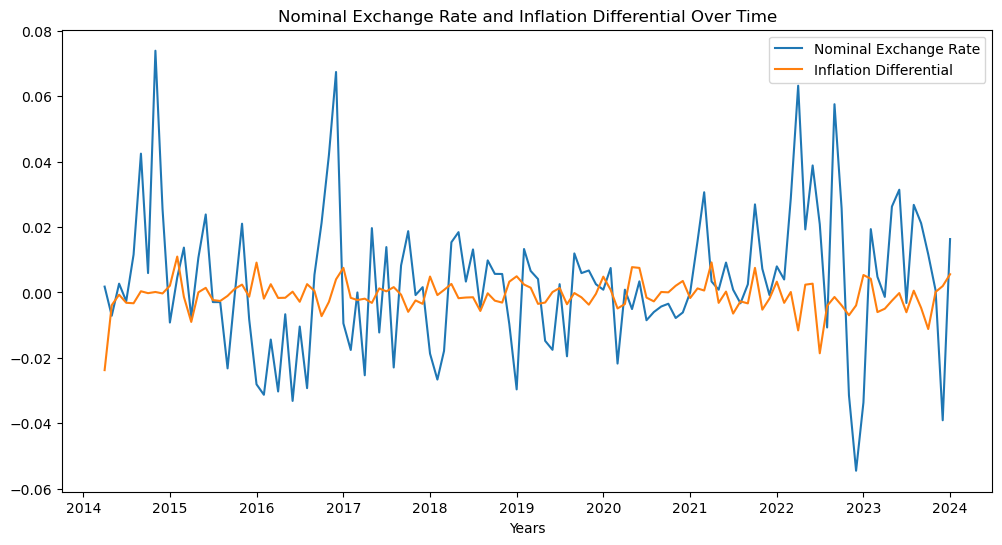

In [126]:

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint


# Ensuring no null values are present
data_log_diff.dropna(inplace=True)

# Selection of time series for cointegration test
nominal_exchange_rate = data_log_diff['Nominal']
inflation_differential = data_log_diff['InflationDiff']


# Performing Engle-Granger cointegration test
coint_t, p_value, crit_values = coint(nominal_exchange_rate, inflation_differential)

print(f"Cointegration test statistic: {coint_t}")
print(f"p-value: {p_value}")
print("Critical values at 1%, 5%, and 10% confidence intervals:", crit_values)

# Plotting the Engle-Granger cointegration test
plt.figure(figsize=(12, 6))
plt.plot(nominal_exchange_rate, label='Nominal Exchange Rate')
plt.plot(inflation_differential, label='Inflation Differential')
plt.title('Nominal Exchange Rate and Inflation Differential Over Time')
plt.legend()
plt.xlabel("Years")
plt.show()

# Plotting ACF and PACF



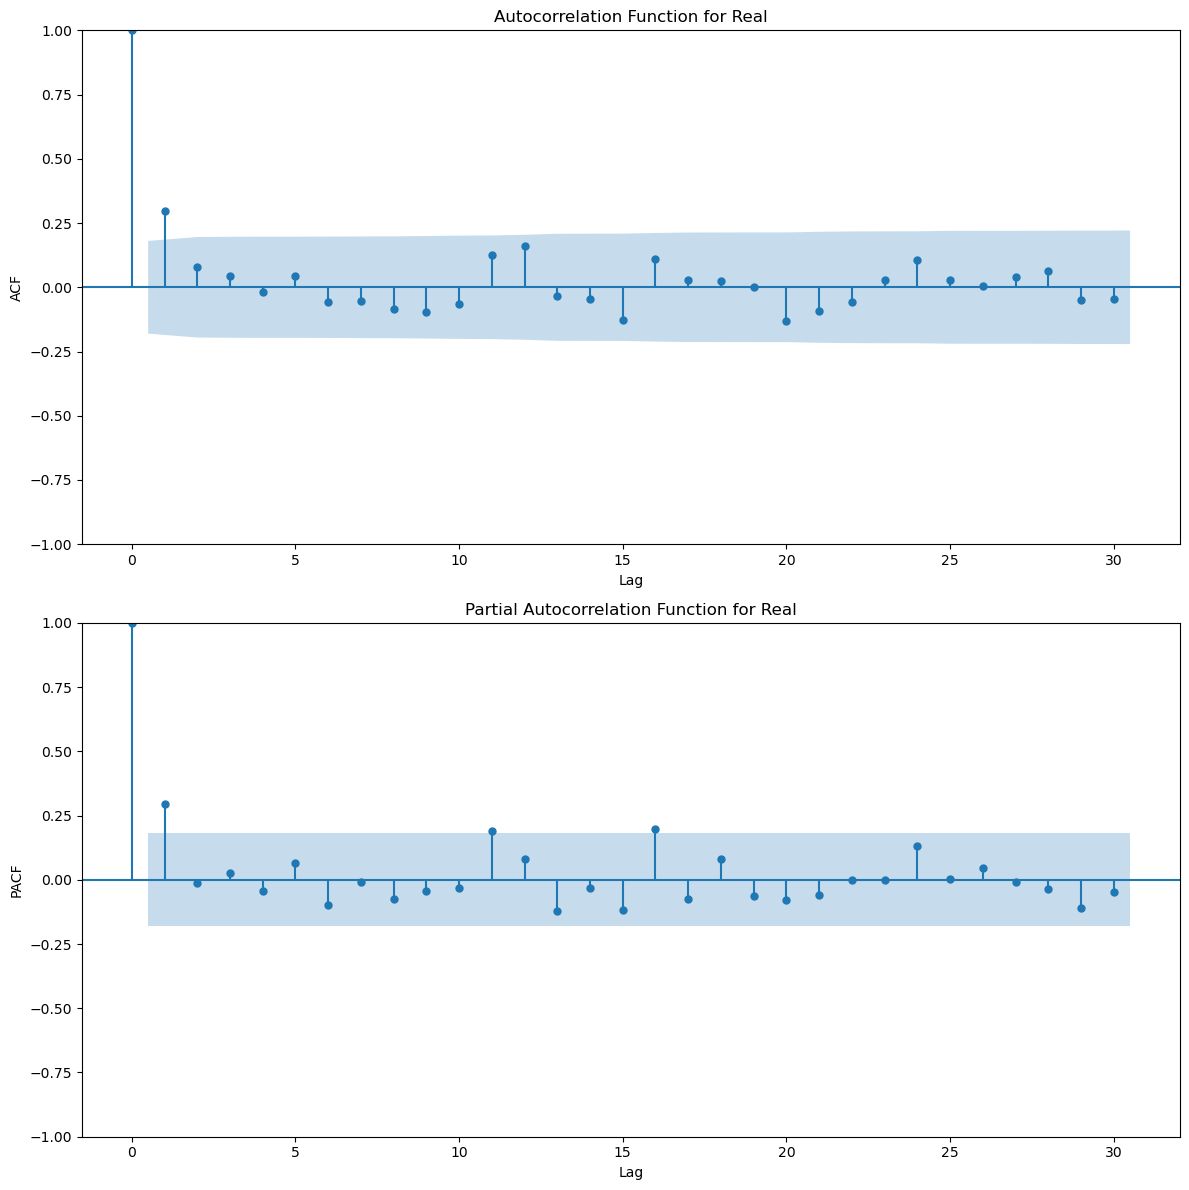

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to plot ACF and PACF 
def plot_acf_pacf(series, name, lags=30):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot ACF
    plot_acf(series, lags=lags, ax=ax1)
    ax1.set_title(f'Autocorrelation Function for {name}')
    ax1.set_xlabel('Lag')  # Set x-axis label for ACF
    ax1.set_ylabel('ACF')  # Set y-axis label for ACF
    
    # Plot PACF
    plot_pacf(series, lags=lags, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function for {name}')
    ax2.set_xlabel('Lag')  # Set x-axis label for PACF
    ax2.set_ylabel('PACF')  # Set y-axis label for PACF
    
    plt.tight_layout()
    plt.show()

# Plotting ACF and PACF for the 'Real' column 
plot_acf_pacf(data_log_diff['Real'], 'Real')

# Model and forecast the real exchange rate using the Box-Jenkins modelling procedure. Estimate at least 6 models.


# Model 1, ARIMA(1,0,1) 

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 288.260
Date:                Fri, 05 Apr 2024   AIC                           -568.519
Time:                        13:39:47   BIC                           -557.437
Sample:                    04-01-2014   HQIC                          -564.019
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.003      1.485      0.138      -0.001       0.010
ar.L1          0.2502      0.255      0.980      0.327      -0.250       0.751
ma.L1          0.0509      0.268      0.189      0.8

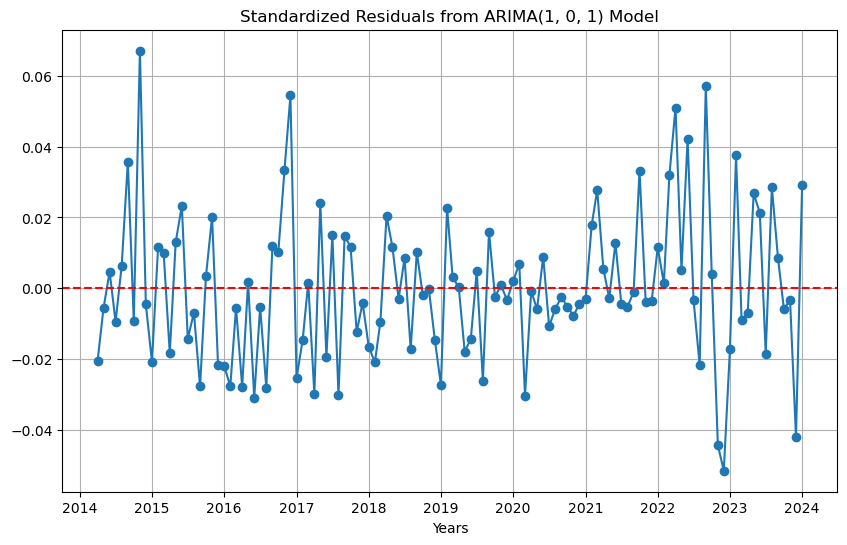

<Figure size 1000x600 with 0 Axes>

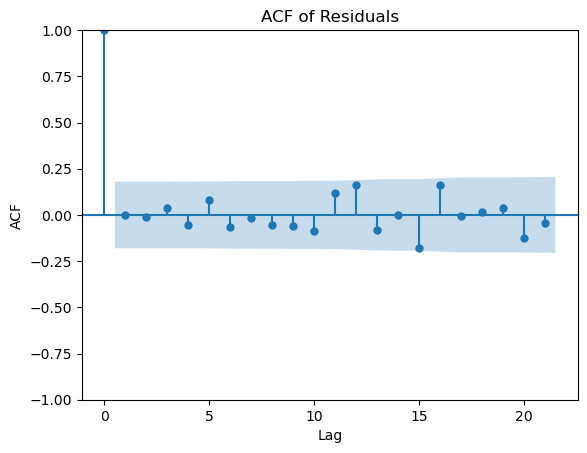

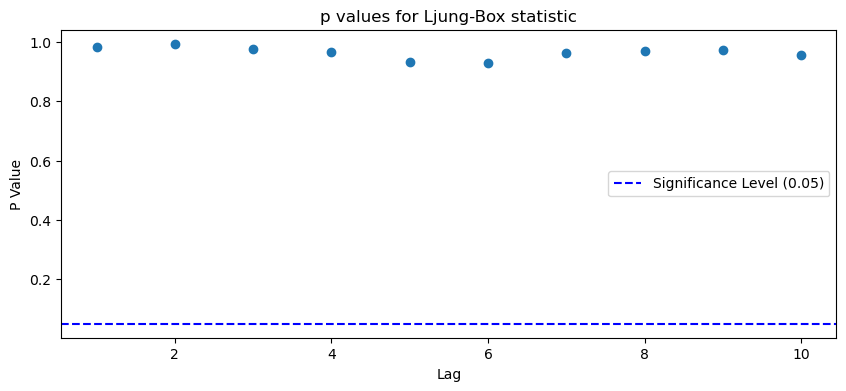

In [129]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(1, 0, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()




# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')

# Output the model summary and forecast
print(model_summary)
print(forecast_df)


# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title('Standardized Residuals from ARIMA(1, 0, 1) Model')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Years')
plt.show()

# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()



# Model 2,ARIMA(1,0,0)

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 288.244
Date:                Fri, 05 Apr 2024   AIC                           -570.488
Time:                        13:39:54   BIC                           -562.176
Sample:                    04-01-2014   HQIC                          -567.113
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0043      0.003      1.489      0.136      -0.001       0.010
ar.L1          0.2974      0.087      3.420      0.001       0.127       0.468
sigma2         0.0004   5.43e-05      8.132      0.0

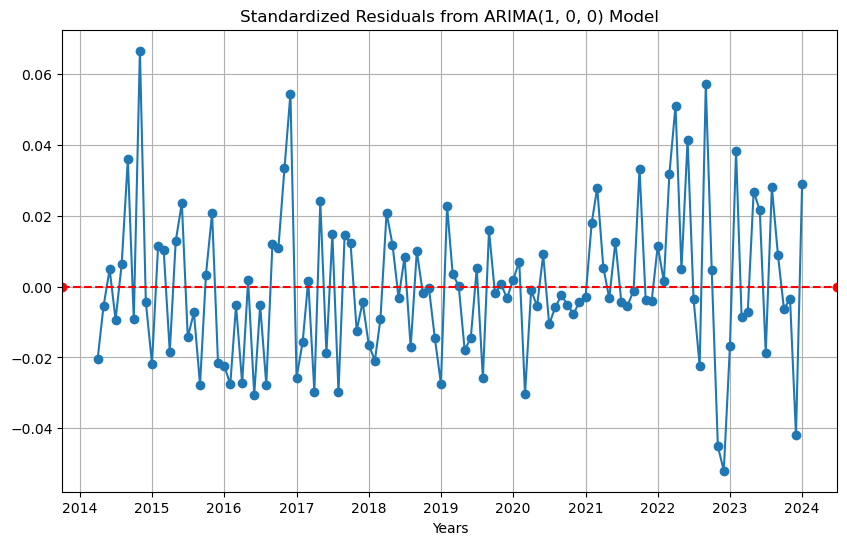

<Figure size 1000x600 with 0 Axes>

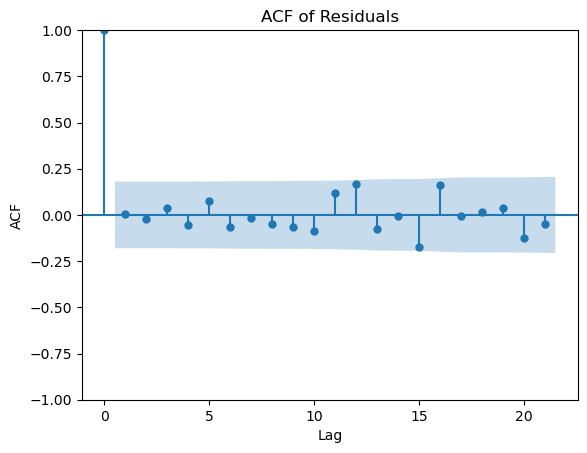

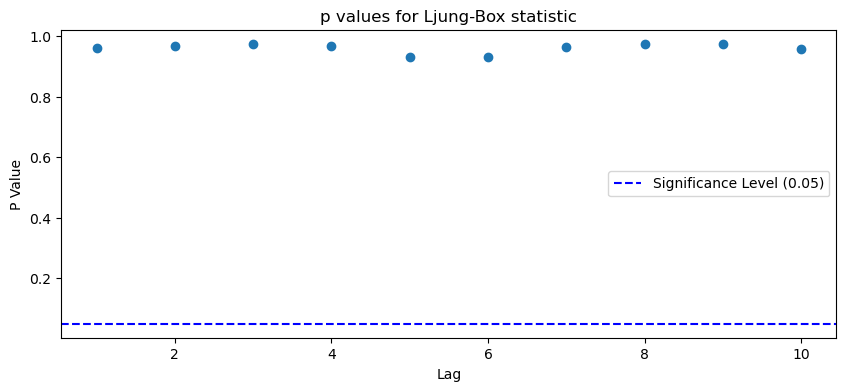

In [130]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(1, 0, 0))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')

# Output the model summary and forecast
print(model_summary)
print(forecast_df)

# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title('Standardized Residuals from ARIMA(1, 0, 0) Model')
plt.axhline(0, linestyle='--', color='red', marker='o')
plt.xlabel('Years')
plt.show()

# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()



# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()



# Model 3, ARIMA(0,0,1)

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 288.079
Date:                Fri, 05 Apr 2024   AIC                           -570.159
Time:                        13:39:57   BIC                           -561.847
Sample:                    04-01-2014   HQIC                          -566.784
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.003      1.627      0.104      -0.001       0.010
ma.L1          0.2967      0.094      3.140      0.002       0.111       0.482
sigma2         0.0004   5.21e-05      8.498      0.0

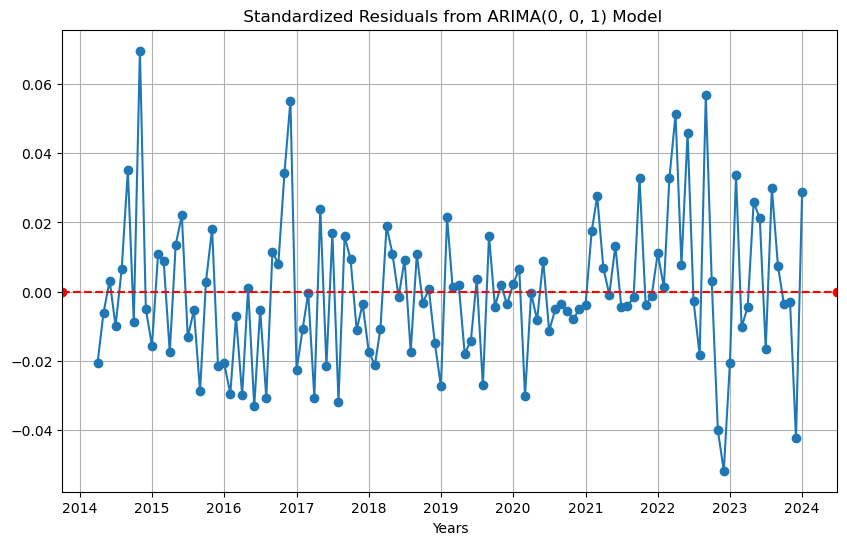

<Figure size 1000x600 with 0 Axes>

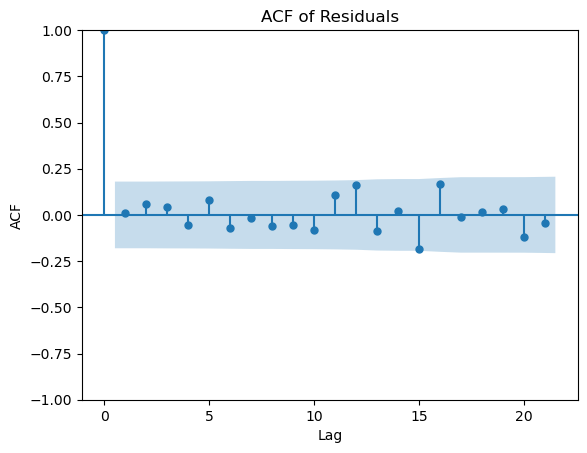

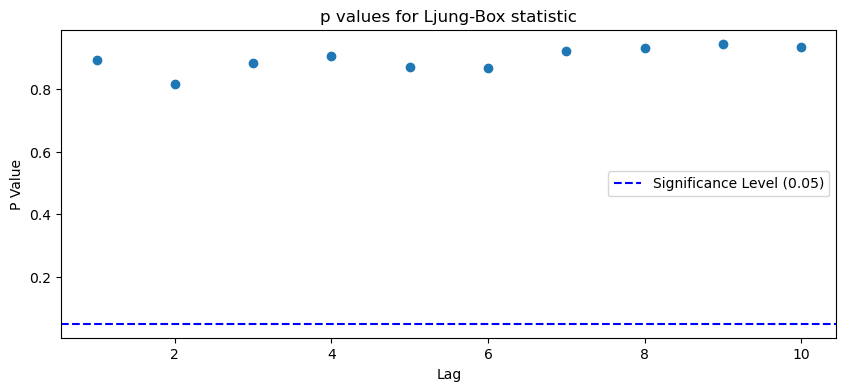

In [131]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(0, 0, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')

# Output the model summary and forecast
print(model_summary)
print(forecast_df)

# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title(' Standardized Residuals from ARIMA(0, 0, 1) Model')
plt.axhline(0, linestyle='--', color='red', marker='o')
plt.xlabel('Years')
plt.show()

# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()


# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()




# Model 4, ARIMA(1,1,1)

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 283.280
Date:                Fri, 05 Apr 2024   AIC                           -560.560
Time:                        13:40:04   BIC                           -552.273
Sample:                    04-01-2014   HQIC                          -557.195
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3059      0.085      3.617      0.000       0.140       0.472
ma.L1         -0.9905      0.039    -25.097      0.000      -1.068      -0.913
sigma2         0.0004   5.43e-05      8.271      0.0

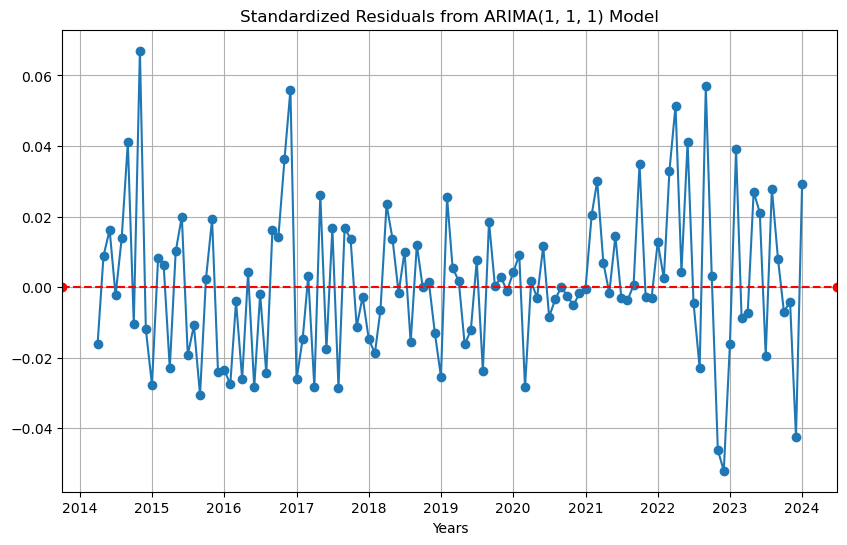

<Figure size 1000x600 with 0 Axes>

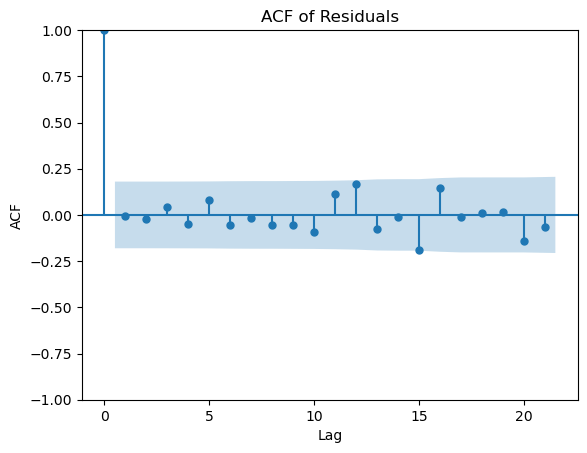

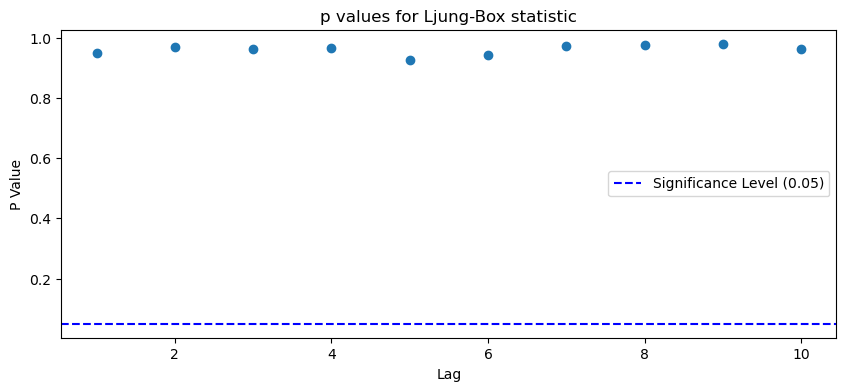

In [132]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')

# Output the model summary and forecast
print(model_summary)
print(forecast_df)

# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title('Standardized Residuals from ARIMA(1, 1, 1) Model')
plt.axhline(0, linestyle='--', color='red', marker='o')
plt.xlabel('Years')
plt.show()

# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()


# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()




# Model 5, ARIMA(1,1,0)

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 267.594
Date:                Fri, 05 Apr 2024   AIC                           -531.188
Time:                        13:40:07   BIC                           -525.663
Sample:                    04-01-2014   HQIC                          -528.945
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3492      0.076     -4.594      0.000      -0.498      -0.200
sigma2         0.0006   7.46e-05      8.090      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   1.12   Jarque-

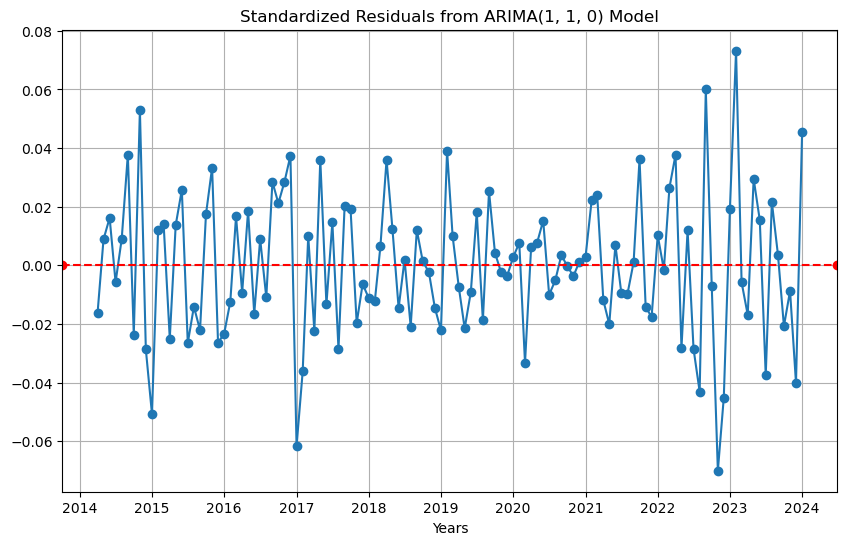

<Figure size 1000x600 with 0 Axes>

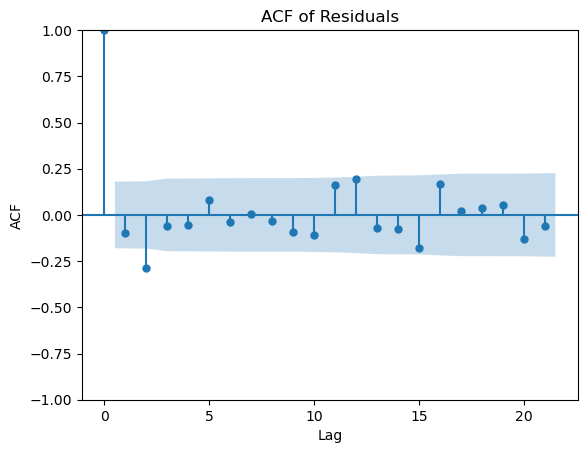

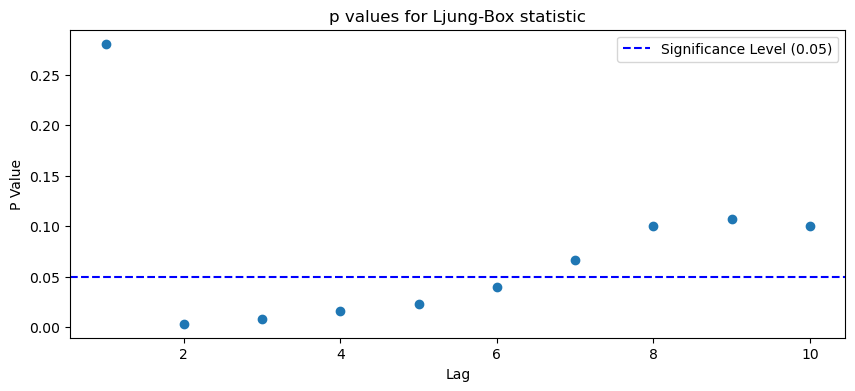

In [133]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(1, 1, 0))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')


# Output the model summary and forecast
print(model_summary)
print(forecast_df)

# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title('Standardized Residuals from ARIMA(1, 1, 0) Model')
plt.axhline(0, linestyle='--', color='red', marker='o')
plt.xlabel('Years')
plt.show()


# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()



# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()




# Model 6, ARIMA(0,1,1)

C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smits\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Real   No. Observations:                  118
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 278.018
Date:                Fri, 05 Apr 2024   AIC                           -552.035
Time:                        13:40:12   BIC                           -546.511
Sample:                    04-01-2014   HQIC                          -549.793
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9459      0.026    -35.713      0.000      -0.998      -0.894
sigma2         0.0005   5.28e-05      9.380      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   8.98   Jarque-

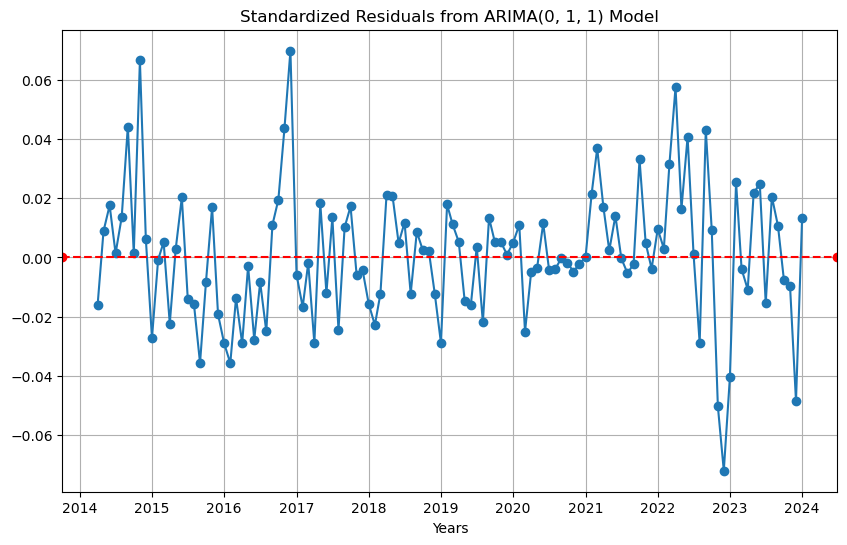

<Figure size 1000x600 with 0 Axes>

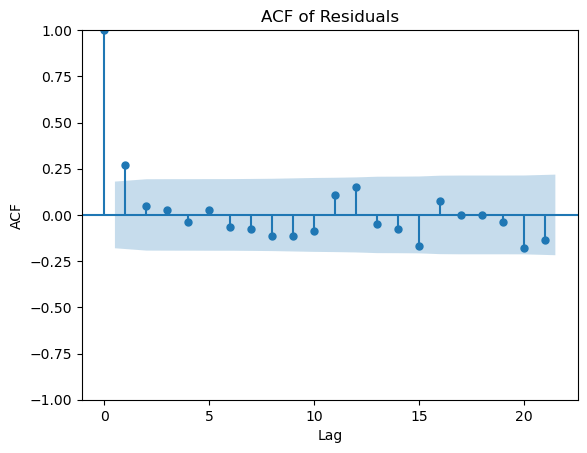

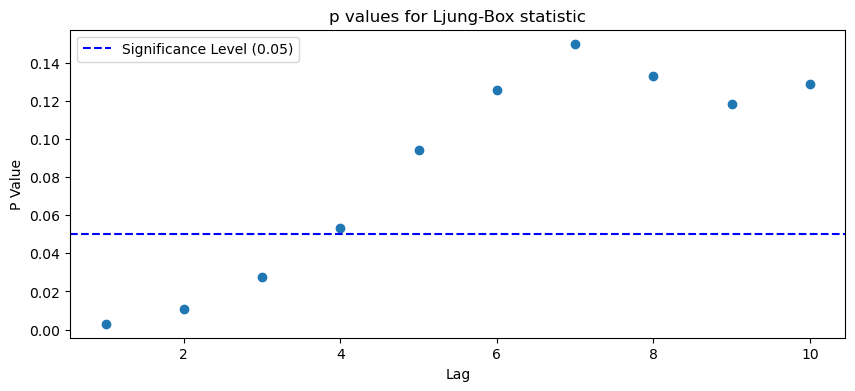

In [134]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import probplot
from statsmodels.stats.diagnostic import acorr_ljungbox




# Fit the ARIMA model
model = ARIMA(data_log_diff['Real'], order=(0, 1, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

# Get the residuals
residuals = model_fit.resid

# Forecast the next 12 periods
n_periods = 12
forecast = model_fit.get_forecast(steps=n_periods)
forecast_mean = forecast.predicted_mean

# Last know log_value
last_log_value = data_log['Real'].iloc[-1]


# Reverting the differenced values and converting log to real values
log_forecast = last_log_value + np.cumsum(forecast_mean)
real_forecast = np.exp(log_forecast)


# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data_log_diff.index[-1], periods=n_periods + 1, freq='M')[1:]
forecast_df = pd.DataFrame({'Forecast Date': forecast_dates, 'Forecasted Real Exchange Rate': real_forecast}).set_index('Forecast Date')

# Output the model summary and forecast
print(model_summary)
print(forecast_df)

# Plotting the residuals plot
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.grid(True)
plt.title('Standardized Residuals from ARIMA(0, 1, 1) Model')
plt.axhline(0, linestyle='--', color='red', marker='o')
plt.xlabel('Years')
plt.show()

# ACF plot of the residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()



# Ljung-Box test on the residuals
lb_values = acorr_ljungbox(residuals, lags=10, return_df=True)

# Plot the p-values
plt.figure(figsize=(10, 4))
plt.plot(lb_values['lb_pvalue'], marker='o', linestyle='')
plt.axhline(y=0.05, color='blue', linestyle='--', label='Significance Level (0.05)')
plt.title('p values for Ljung-Box statistic')
plt.xlabel('Lag')
plt.ylabel('P Value')
plt.legend()
plt.show()

